In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [173]:
import pandas as pd
import numpy as np
import re
import matplotlib
% matplotlib inline
matplotlib.get_backend()
import seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [207]:
df=pd.read_csv("/content/drive/My Drive/projectm/Information.csv", encoding='ISO-8859-1')

In [208]:
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,(rp),302,female,0084B4,capuletrosa,yes,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",2513,male,CFB929,BenNight41,yes,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,50,male,0084B4,realuzzyfluxz,yes,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,Anti-statist; I homeschool my kids. Aspiring t...,70804,female,9266CC,argumatronic,yes,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [ ]:
df.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


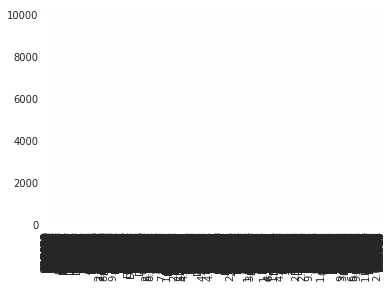

In [ ]:
df.link_color.value_counts().plot.bar()

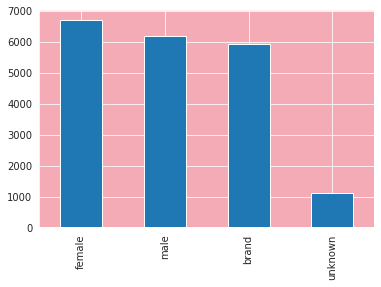

In [ ]:
df.gender.value_counts().plot.bar()

In [ ]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [ ]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

df['text'] = [cleaning(s) for s in df['text']]
df['Description'] = [cleaning(s) for s in df['description']]

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
df['text'] = df['text'].str.lower().str.split()
df['text'] = df['text'].apply(lambda x : [item for item in x if item not in stop])

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,Description
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,"[robbie, e, responds, critics, win, eddie, edw...",NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,i sing my own rhythm
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,"[ûïit, felt, like, friends, living, story, û, ...",NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),i m the author of novels filled with family dr...


#Tweets Gender Counts

In [ ]:
df.gender.value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [ ]:
Male = df[df['gender'] == 'male']
Female = df[df['gender'] == 'female']
Brand = df[df['gender'] == 'brand']
Male_Words = pd.Series(' '.join(Male['text'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['text'].astype(str)).lower().split(" ")).value_counts()[:20]
Brand_words = pd.Series(' '.join(Brand['text'].astype(str)).lower().split(" ")).value_counts()[:10]

In [ ]:
Female_Words

'ù',         1025
'like',       403
'get',        314
'one',        270
'day',        253
'ù']          248
'love',       240
'go',         239
'û',          235
'time',       201
'amp',        196
'people',     194
'âù',         189
'know',       174
'last',       171
'new',        170
'got',        157
'back',       155
'ü',          155
'make',       154
dtype: int64

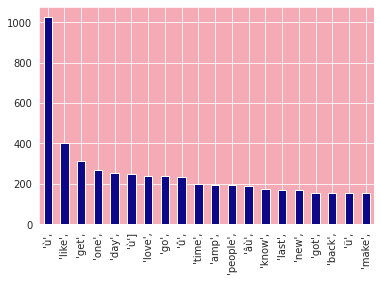

In [168]:
Female_Words.plot(kind='bar',stacked=True, colormap='plasma')

In [ ]:
Male_Words

'ù',         365
'like',      322
'get',       309
'û',         235
'one',       209
'new',       192
'time',      191
'go',        185
'love',      179
'people',    155
'day',       153
'see',       151
'good',      150
'know',      148
'amp',       148
'would',     139
'back',      138
'think',     133
'make',      132
'got',       131
dtype: int64

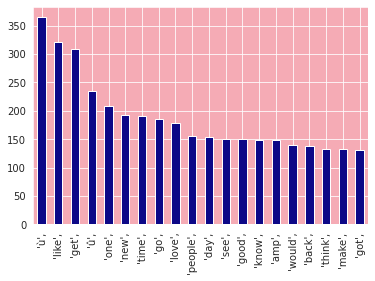

In [167]:
Male_Words.plot(kind='bar',stacked=True, colormap='plasma')

In [ ]:
Brand_words

'weather',    2278
['get',       1160
'updates',    1145
'channel']    1137
'û',           403
'new',         196
'amp',         189
'us',          164
'get',         162
'like',        140
dtype: int64

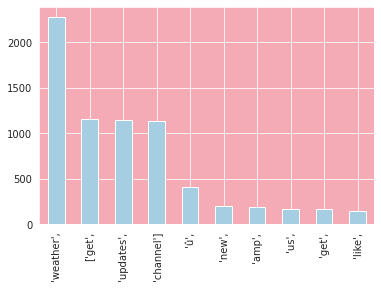

In [169]:
Brand_words.plot(kind='bar',stacked=True, colormap='Paired')

#Which gender makes more typos.

In [131]:
Mtypos=Male['text'].to_list()

In [128]:
Mtypos

[['robbie',
  'e',
  'responds',
  'critics',
  'win',
  'eddie',
  'edwards',
  'worldtitleseries',
  'nsybbmvjkz'],
 ['ûïit',
  'felt',
  'like',
  'friends',
  'living',
  'story',
  'û',
  'arngeyhno',
  'retired',
  'ian',
  'cizcanpqfz'],
 ['absolutely',
  'adore',
  'louis',
  'starts',
  'songs',
  'hits',
  'hard',
  'feels',
  'good'],
 ['hi',
  'jordanspieth',
  'looking',
  'url',
  'use',
  'ifttt',
  'typically',
  'see',
  'advanced',
  'user',
  'pgatour',
  'houpel'],
 ['gala',
  'bingo',
  'clubs',
  'bought',
  'å',
  'uk',
  'largest',
  'high',
  'street',
  'bingo',
  'operator',
  'gala',
  'taken',
  'û',
  'hzeeykjud'],
 ['olyazzy',
  'ditto',
  'still',
  'learning',
  'favourites',
  'retweet',
  'stuff',
  'least',
  'sucks',
  'less',
  'facebook',
  'haha',
  'p'],
 ['caribbros', 'jstsaleem', 'understand', 'get', 'server', 'get'],
 ['yall',
  'lmfaoo',
  'right',
  'chorus',
  'came',
  'tear',
  'rolled',
  'face',
  'ayuqdptvse'],
 ['james',
  'bond',
  

In [132]:
maleTypos=Mtypos[0]
for i in range(1,len(Mtypos)):
    for j in Mtypos[i]:
        maleTypos.append(j)

In [133]:
maleTypos

['robbie',
 'e',
 'responds',
 'critics',
 'win',
 'eddie',
 'edwards',
 'worldtitleseries',
 'nsybbmvjkz',
 'ûïit',
 'felt',
 'like',
 'friends',
 'living',
 'story',
 'û',
 'arngeyhno',
 'retired',
 'ian',
 'cizcanpqfz',
 'absolutely',
 'adore',
 'louis',
 'starts',
 'songs',
 'hits',
 'hard',
 'feels',
 'good',
 'hi',
 'jordanspieth',
 'looking',
 'url',
 'use',
 'ifttt',
 'typically',
 'see',
 'advanced',
 'user',
 'pgatour',
 'houpel',
 'gala',
 'bingo',
 'clubs',
 'bought',
 'å',
 'uk',
 'largest',
 'high',
 'street',
 'bingo',
 'operator',
 'gala',
 'taken',
 'û',
 'hzeeykjud',
 'olyazzy',
 'ditto',
 'still',
 'learning',
 'favourites',
 'retweet',
 'stuff',
 'least',
 'sucks',
 'less',
 'facebook',
 'haha',
 'p',
 'caribbros',
 'jstsaleem',
 'understand',
 'get',
 'server',
 'get',
 'yall',
 'lmfaoo',
 'right',
 'chorus',
 'came',
 'tear',
 'rolled',
 'face',
 'ayuqdptvse',
 'james',
 'bond',
 'premier',
 'night',
 'everymancinema',
 'oxted',
 'sidiedey',
 'let',
 'hope',
 'liv

In [135]:
Ftypos=Female['text'].to_list()

In [136]:
Ftypos

[['watching',
  'neighbours',
  'sky',
  'catching',
  'neighbs',
  'xxx',
  'ù',
  'äù',
  'äù',
  'äùôîù',
  'èùô',
  'ù',
  'è',
  'xxx'],
 ['ive',
  'seen',
  'people',
  'train',
  'lamps',
  'chairs',
  'tvs',
  'etc',
  'wzfpvmi'],
 ['aphmau',
  'pic',
  'defines',
  'mcd',
  'fangirls',
  'fanboys',
  'mcd',
  'shippers',
  'xd'],
 ['evielady',
  'lovely',
  'tree',
  'year',
  'never',
  'seen',
  'gorgeous',
  'autumn',
  'lour'],
 ['put', 'ass', 'line', 'repay'],
 ['even', 'need', 'sound', 'effects', 'diviners', 'tonight'],
 ['erogwtftyo', 'glow', 'satisfaction', 'glow', 'rdymcvpkx'],
 ['giannaaa',
  'lmao',
  'ù',
  'âù',
  'â',
  'dude',
  'hella',
  'scared',
  'next',
  'episode',
  'bc',
  'ending',
  'yesterday'],
 ['craftyear', 'isabelpascual', 'thank', 'retweets'],
 ['girls',
  'went',
  'sleep',
  'guys',
  'sat',
  'floor',
  'watched',
  'usù',
  'âù',
  'â'],
 ['chrisaofficial', 'right', 'sideù', 'â', 'ïîù', 'ü', 'xxx'],
 ['sydniejr',
  'except',
  'hallmark',
  

In [138]:
femaleTypos=Ftypos[0]
for i in range(1,len(Ftypos)):
    for j in Ftypos[i]:
        femaleTypos.append(j)

In [139]:
femaleTypos

['watching',
 'neighbours',
 'sky',
 'catching',
 'neighbs',
 'xxx',
 'ù',
 'äù',
 'äù',
 'äùôîù',
 'èùô',
 'ù',
 'è',
 'xxx',
 'ive',
 'seen',
 'people',
 'train',
 'lamps',
 'chairs',
 'tvs',
 'etc',
 'wzfpvmi',
 'aphmau',
 'pic',
 'defines',
 'mcd',
 'fangirls',
 'fanboys',
 'mcd',
 'shippers',
 'xd',
 'evielady',
 'lovely',
 'tree',
 'year',
 'never',
 'seen',
 'gorgeous',
 'autumn',
 'lour',
 'put',
 'ass',
 'line',
 'repay',
 'even',
 'need',
 'sound',
 'effects',
 'diviners',
 'tonight',
 'erogwtftyo',
 'glow',
 'satisfaction',
 'glow',
 'rdymcvpkx',
 'giannaaa',
 'lmao',
 'ù',
 'âù',
 'â',
 'dude',
 'hella',
 'scared',
 'next',
 'episode',
 'bc',
 'ending',
 'yesterday',
 'craftyear',
 'isabelpascual',
 'thank',
 'retweets',
 'girls',
 'went',
 'sleep',
 'guys',
 'sat',
 'floor',
 'watched',
 'usù',
 'âù',
 'â',
 'chrisaofficial',
 'right',
 'sideù',
 'â',
 'ïîù',
 'ü',
 'xxx',
 'sydniejr',
 'except',
 'hallmark',
 'movies',
 'start',
 'get',
 'anything',
 'done',
 'ù',
 'ù',
 

In [142]:
from nltk.corpus import brown
word_list = brown.words()
word_set = set(word_list)

In [141]:
import nltk
nltk.download('brown')
  

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [143]:
Mcount=[]
for i in maleTypos:
    Mcount.append(i in word_set)

In [144]:
Mcount

[False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 

In [145]:
Fcount=[]
for i in femaleTypos:
    Fcount.append(i in word_set)

In [146]:
Fcount

[True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 Fa

In [171]:
MaleTypos = pd.DataFrame (Mcount,columns=['Male_Typos'])
FemaleTypos = pd.DataFrame (Fcount,columns=['Female_Typos'])

In [161]:
FemaleTypos.Female_Typos.value_counts()

True     40089
False    20040
Name: Female_Typos, dtype: int64

In [162]:
MaleTypos.Male_Typos.value_counts()

True     38561
False    19059
Name: Male_Typos, dtype: int64

In [158]:
import seaborn as sb

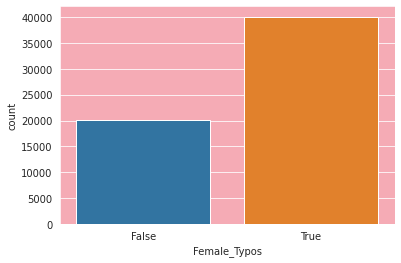

In [194]:
sb.countplot(x='Female_Typos',data=FemaleTypos)

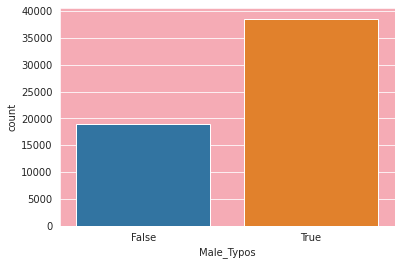

In [190]:
sb.countplot(x='Male_Typos',data=MaleTypos)

#Machine Model

In [209]:
df = df.drop(['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at',  'created', 'gender_gold', 'link_color', 'profile_yn_gold', 'profileimage', 'sidebar_color', 'tweet_coord', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone',  'name'],axis=1)

In [210]:
drop_items_idx = df[df['gender'] == 'unknown'].index

df.drop (index = drop_items_idx, inplace = True)

df['gender'].value_counts()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

In [211]:
print ('profile_yn information:\n',df['profile_yn'].value_counts())

df[df['profile_yn'] == 'no']['gender']

profile_yn information:
 yes    18836
no        97
Name: profile_yn, dtype: int64


109      NaN
137      NaN
496      NaN
582      NaN
679      NaN
        ... 
18524    NaN
18700    NaN
18840    NaN
19773    NaN
19842    NaN
Name: gender, Length: 97, dtype: object

In [212]:
drop_items_idx = df[df['profile_yn'] == 'no'].index

df.drop (index = drop_items_idx, inplace = True)

print (df['profile_yn'].value_counts())

df.drop (columns = ['profile_yn','profile_yn:confidence'], inplace = True)

yes    18836
Name: profile_yn, dtype: int64


In [213]:
# Double check the data 
print (df['gender'].value_counts())

print ('---------------------------')
df.info()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64
---------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20049
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             18836 non-null  object 
 1   gender:confidence  18836 non-null  float64
 2   description        15522 non-null  object 
 3   fav_number         18836 non-null  int64  
 4   retweet_count      18836 non-null  int64  
 5   text               18836 non-null  object 
 6   tweet_count        18836 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ MB


In [214]:
print ('Full data items: ', df.shape)
print ('Data with label-confidence < 100%: ', df[df['gender:confidence'] < 1].shape)

Full data items:  (18836, 7)
Data with label-confidence < 100%:  (5032, 7)


In [215]:
drop_items_idx = df[df['gender:confidence'] < 1].index

df.drop (index = drop_items_idx, inplace = True)

print (df['gender:confidence'].value_counts())

df.drop (columns = ['gender:confidence'], inplace = True)

1.0    13804
Name: gender:confidence, dtype: int64


In [216]:
# Double check the data 
print (df['gender'].value_counts())

print ('---------------------------')
df.info()

female    5367
male      4653
brand     3784
Name: gender, dtype: int64
---------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         13804 non-null  object
 1   description    11773 non-null  object
 2   fav_number     13804 non-null  int64 
 3   retweet_count  13804 non-null  int64 
 4   text           13804 non-null  object
 5   tweet_count    13804 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 754.9+ KB


In [217]:
from collections import Counter

twit_vocab = Counter()
for twit in df['text']:
    for word in twit.split(' '):
        twit_vocab[word] += 1
        
# desc_vocab = Counter()
# for twit in data['description']:
#     for word in twit.split(' '):
#         desc_vocab[word] += 1
        
twit_vocab.most_common(20)
# desc_vocab.most_common(20)

[('the', 8370),
 ('and', 7964),
 ('to', 4196),
 ('I', 3229),
 ('a', 3064),
 ('of', 2741),
 ('in', 2270),
 ('you', 2173),
 ('for', 2157),
 ('The', 2018),
 ('is', 1878),
 ('on', 1621),
 ('my', 1362),
 ('it', 1205),
 ('', 1184),
 ('with', 1156),
 ('Weather', 1074),
 ('that', 1032),
 ('from', 1022),
 ('me', 1001)]

In [218]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [219]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

twit_vocab_reduced = Counter()
for w, c in twit_vocab.items():
    if not w in stop:
        twit_vocab_reduced[w]=c

twit_vocab_reduced.most_common(20)

[('I', 3229),
 ('The', 2018),
 ('', 1184),
 ('Weather', 1074),
 ('-', 767),
 ("I'm", 651),
 ('like', 628),
 ('Get', 627),
 ('get', 570),
 ('Updates', 538),
 ('Channel.', 537),
 ('And', 487),
 ('one', 416),
 ('&amp;', 348),
 ('new', 343),
 ('love', 340),
 ('people', 315),
 ('time', 301),
 ('go', 290),
 ('know', 288)]

In [220]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

print(preprocessor('This!!@ twit :) is <b>nice</b>'))

this twit is nice :)


In [221]:
#from sklearn_pandas import DataFrameMapper # Notice that this is actually Sklearn-Pandas library
%matplotlib inline

In [222]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

print(tokenizer('Hi there, I am loving this, like with a lot of love'))
print(tokenizer_porter('Hi there, I am loving this, like with a lot of love'))

['Hi', 'there,', 'I', 'am', 'loving', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']
['Hi', 'there,', 'I', 'am', 'love', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']


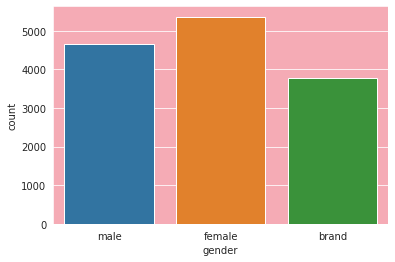

In [223]:
sns.countplot(df['gender'],label="Gender")

In [224]:
import seaborn as sns

In [225]:
# Firstly, convert categorical labels into numerical ones
# Function for encoding categories
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['gender']=df['gender'].astype("|S")
y = encoder.fit_transform(df['gender'])


# split the dataset in train and test
X = df['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#In the code line above, stratify will create a train set with the same class balance than the original set

X_train.head()

19087    @rvpisarapist my players literally give 110% a...
11212    Backers of the atrium lobby considered joining...
14799    I was supposed to receive my @SpiritHalloween ...
6846     Depression comes when you least expect it, lik...
1226     Grimes Throws a Fun, Bloody Party in "Flesh Wi...
Name: text, dtype: object

In [226]:
from sklearn.model_selection  import train_test_split
from sklearn.pipeline import Pipeline

#Logistic Regression

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [228]:
def tokens(x):
 return x.split(',')
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect= TfidfVectorizer( tokenizer=tokens ,use_idf=True, smooth_idf=True, sublinear_tf=False)

In [229]:
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.6001931434089812
Confusion matrix:
 [[ 871  116  149]
 [ 215 1052  343]
 [ 256  577  563]]
Classification report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.70      1136
           1       0.60      0.65      0.63      1610
           2       0.53      0.40      0.46      1396

    accuracy                           0.60      4142
   macro avg       0.60      0.61      0.60      4142
weighted avg       0.59      0.60      0.59      4142



#SVM

In [230]:
# the SVM model
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.598020280057943
Confusion matrix:
 [[ 858  117  161]
 [ 219 1010  381]
 [ 243  544  609]]
Classification report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70      1136
           1       0.60      0.63      0.62      1610
           2       0.53      0.44      0.48      1396

    accuracy                           0.60      4142
   macro avg       0.59      0.61      0.60      4142
weighted avg       0.59      0.60      0.59      4142



#Random Forest Classifier

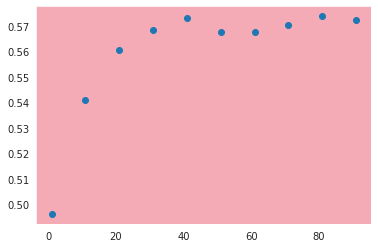

In [231]:
from sklearn.ensemble import RandomForestClassifier
# Plot the correlation between n_estimators and accuracy

# X_train_sample = X_train.head(5000) # this is series
# y_train_sample = y_train[:5000] # this is array

# print (X_train_sample.shape)
# print (y_train_sample.shape)

n = range (1,100,10) #step 10

results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()
plt.scatter(n, results)

In [232]:
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 40, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.570738773539353
Confusion matrix:
 [[ 700  259  177]
 [ 122 1195  293]
 [ 155  772  469]]
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.62      0.66      1136
           1       0.54      0.74      0.62      1610
           2       0.50      0.34      0.40      1396

    accuracy                           0.57      4142
   macro avg       0.58      0.56      0.56      4142
weighted avg       0.57      0.57      0.56      4142



#Adding content of Description into Text

In [233]:
df.head(3)

,gender,description,fav_number,retweet_count,text,tweet_count
0,b'male',i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964
1,b'male',I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471
3,b'male',"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693


Concatenating 'description' to 'text'

In [234]:
#Fill NaN with empty string
df.fillna("", inplace = True)

# Concatenate text with description, add white space between. 
# By using Series helper functions Series.str()
df['text_description'] = df['text'].str.cat(df['description'], sep=' ')

df['text_description'].isnull().value_counts() # Check if any null values, True if there is at least one.

False    13804
Name: text_description, dtype: int64

Re-create training dataset

In [238]:
# split the dataset in train and test
X = df['text_description']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#In the code line above, stratify will create a train set with the same class balance than the original set

X_train.head()
X_train.isnull().values.any() # Check if any null values, True if there is at least one.

False

#Try with Logistic Regression

In [236]:
from sklearn.linear_model import LogisticRegression

In [239]:
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.6820376629647513
Confusion matrix:
 [[ 959   80   97]
 [ 137 1193  280]
 [ 191  532  673]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      1136
           1       0.66      0.74      0.70      1610
           2       0.64      0.48      0.55      1396

    accuracy                           0.68      4142
   macro avg       0.68      0.69      0.68      4142
weighted avg       0.68      0.68      0.67      4142



#Try with SVM

In [240]:
# the SVM model
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.6868662481892805
Confusion matrix:
 [[ 952   82  102]
 [ 117 1169  324]
 [ 178  494  724]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80      1136
           1       0.67      0.73      0.70      1610
           2       0.63      0.52      0.57      1396

    accuracy                           0.69      4142
   macro avg       0.69      0.69      0.69      4142
weighted avg       0.68      0.69      0.68      4142



#Try with Random Forest Classifier

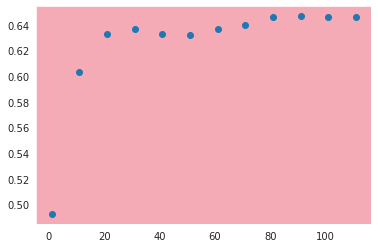

In [241]:
# Plot the correlation between n_estimators and accuracy

# X_train_sample = X_train.head(5000) # this is series
# y_train_sample = y_train[:5000] # this is array

# print (X_train_sample.shape)
# print (y_train_sample.shape)

n = range (1,120,10) #step 10

results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()    
plt.scatter(n, results)

In [242]:
from sklearn.ensemble import RandomForestClassifier

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 80, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.6438918396909705
Confusion matrix:
 [[ 883  147  106]
 [ 108 1339  163]
 [ 143  808  445]]
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1136
           1       0.58      0.83      0.69      1610
           2       0.62      0.32      0.42      1396

    accuracy                           0.64      4142
   macro avg       0.66      0.64      0.63      4142
weighted avg       0.65      0.64      0.62      4142

